In [4]:
import numpy as np
import matplotlib.pyplot as plt

file_paths = [
    'output/R2280/R2280_decoding.npy',
    # 'output/R2487/R2487_decoding.npy',
    # 'output/R2488/R2488_decoding.npy'
    'output/R2490/R2490_decoding.npy',
]
score = np.load(file_paths[1])
print(score.shape)
score_mean = np.mean(score, axis=0)
score_std = np.std(score, axis=0)



(5, 2521)


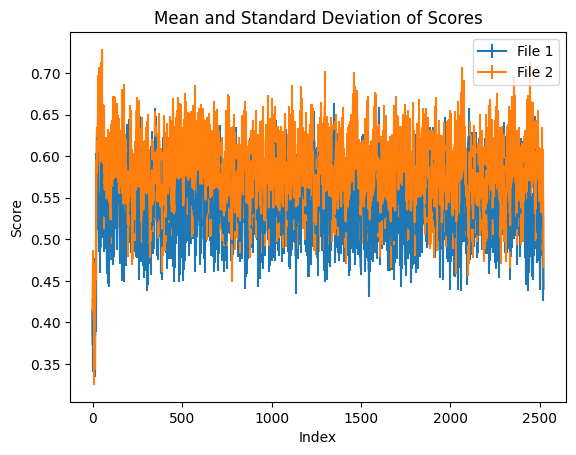

In [5]:
means = []
stds = []

for path in file_paths:
    score = np.load(path)
    score_mean = np.mean(score, axis=0)
    score_std = np.std(score, axis=0)
    means.append(score_mean)
    stds.append(score_std)

# Plotting
x = np.arange(len(means[0]))  # Assuming all files have the same shape
for i, (mean, std) in enumerate(zip(means, stds)):
    plt.errorbar(x, mean, yerr=std, label=f'File {i+1}')

plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Mean and Standard Deviation of Scores')
plt.legend()
plt.show()

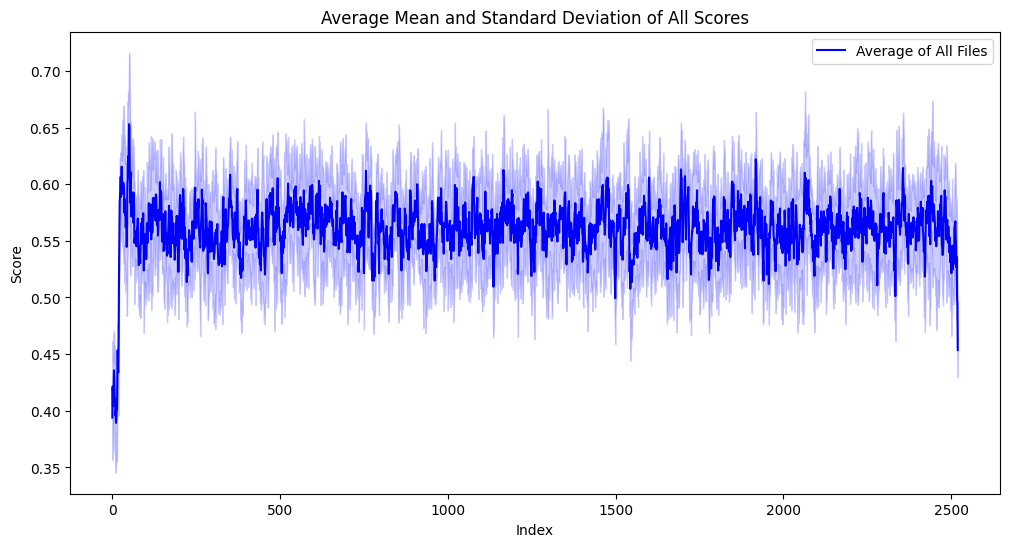

In [6]:
# Load all scores and stack them
all_scores = [np.load(path) for path in file_paths]
stacked_scores = np.stack(all_scores, axis=0)

# Reshape to combine all rows from all files
combined_scores = stacked_scores.reshape(-1, stacked_scores.shape[-1])

# Calculate mean and standard deviation across all rows and files
average_mean = np.mean(combined_scores, axis=0)
average_std = np.std(combined_scores, axis=0)

# Plotting
x = np.arange(len(average_mean))  # 500 points

plt.figure(figsize=(12, 6))
plt.plot(x, average_mean, label='Average of All Files', color='blue')
plt.fill_between(x, average_mean - average_std, average_mean + average_std, color='blue', alpha=0.2)

plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Average Mean and Standard Deviation of All Scores')
plt.legend()
plt.show()